In [14]:
# Continuous Optimization: Shifted Sphere Function (F1) with D=50

# Import all the necessary packages
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [16]:
# Read data from csv
raw_data = pd.read_csv("./Shifted_Sphere.csv")
sphere = raw_data["val"].tolist()
print(sphere)
print(type(sphere))

[97.24993591, 77.06098502, -19.0311488, 25.428698, -22.90880263, 69.57217579, 5.369713926, 61.48073069, -21.30069854, 92.34681338, -93.97588123, 90.74598677, 42.87698027, 29.309646299999997, -10.66954845, -65.0746178, 67.04941631, 94.0187703, -73.00502019, -49.80219854, 82.00142499, 35.29318273, 24.63214922, 2.443137469, -99.30345089, -54.62233878, 95.69145814, 72.25048084, -97.12295522, -2.844627019, -16.71940701, 54.58048362, -2.370493447, 4.51291385, 56.40988583, 18.24586956, -74.72144481, -78.05614655, 32.58107758, 99.41862299, -30.76381166, -64.78909692, -86.42220775, -38.12082266, -33.04804035, -24.76648648, 90.44136625, 43.86410226, 55.86848706, 23.53173227, 29.84766684, 51.25666094, -70.43316212, 19.89073553, 79.72173787, -65.61342889, 63.78562162, -86.14124825, 91.13745240000002, -36.53243248, -98.95976531, 51.98710144, -38.26403603, 43.05113501, -83.81049637, 69.17558482, 43.67524066, 74.07859959999999, 74.43193847, 52.31264481, 33.8912918, 80.40565424, 64.29246396, 66.531453

In [17]:
# Initialize function parameters
D = 50
bias = -450
lower_bound = -100
upper_bound = 100
sol_list = []

In [18]:
# Define the Shifted Sphere function with the previous parameters
def function(x, data=sphere, dim=D, f_bias=bias):
    F = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        F += z**2
    res = F + f_bias
    return res

In [19]:
# Create a function to gather all the solutions computed. To be used in callback
def sol_set(xk):
    sol_res = function(xk)
    sol_list.append(sol_res)
    return sol_res


In [20]:
# Create a function to compute the initial guess with random uniform distribution
def sol_init(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [21]:
# Create a function to solve this problem
def solver(dimension, lower_bound, upper_bound):
    global sol
    # Compute the initial guess
    x0 = sol_init(dimension, lower_bound, upper_bound)
    # Minimize the function thanks to the BFGS algorithm
    sol = minimize(sol_set, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=sol_set)
    return sol, sol_list

In [28]:
# Create a function to plot the convergence curve
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)
    plt.title("Continuous Optimization: Shifted Sphere Function (F1) with D=50", fontsize=16)
    plt.xlabel("Time (iterations)", fontsize=12)
    plt.ylabel("Fitness", fontsize=12)
    plt.show()

In [29]:
# Start timer to get computational time
t1 = time.time()

In [30]:
# Solve the problem
solver(D, lower_bound, upper_bound)

(      fun: -449.9999999997653
  hess_inv: array([[ 9.50712787e-01, -2.80667885e-02, -1.88773998e-04, ...,
          9.67364152e-03,  1.12325934e-02,  0.00000000e+00],
        [-2.80667885e-02,  9.82529620e-01,  4.82822829e-03, ...,
          4.21508917e-03, -9.67244939e-04,  0.00000000e+00],
        [-1.88773998e-04,  4.82822829e-03,  9.83623432e-01, ...,
          4.32898883e-03,  2.44744023e-02,  0.00000000e+00],
        ...,
        [ 9.67364152e-03,  4.21508917e-03,  4.32898883e-03, ...,
          9.96976474e-01, -8.60783959e-03,  0.00000000e+00],
        [ 1.12325934e-02, -9.67244939e-04,  2.44744023e-02, ...,
         -8.60783959e-03,  9.60990525e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])
       jac: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.81469727e-06, -3.81469727e-06, -3.81469727e-06, -7.62939453e-06,
        -3.81469727e-06, 

In [31]:
# Stop timer and compute computational time
t2 = time.time()
comp_time = t2 - t1

In [32]:
# Print parameters and solutions
print("==========================================================================\n")
print("Function: Shifted Sphere Function (F1)\n")
print("01. Chosen algorithm to solve the problem: BFGS from SciPy\n")
print("02. Parameters:")
print("\nDimension:", D)
print("\nSearch space: [", lower_bound, ",", upper_bound, "]")
print("\nBias:", bias)
print("\n03. Final results:")
sol_df = pd.DataFrame(sol.x, columns=[''])
sol_df.to_csv("Sphere_sol50.csv", sep=",")
print("\n    - Solutions:", sol_df)
print("\n    - Fitness:", round(sol.fun, 2))
print("\nNumber of function evaluations:", sol.nfev)
print("\nStopping criterion:", sol.nit, "iterations")
print("\nComputational time:", round(comp_time, 2), "seconds\n")
print("==========================================================================")


Function: Shifted Sphere Function (F1)

01. Chosen algorithm to solve the problem: BFGS from SciPy

02. Parameters:

Dimension: 50

Search space: [ -100 , 100 ]

Bias: -450

03. Final results:

    - Solutions:              
0   97.249935
1   77.060984
2  -19.031150
3   25.428697
4  -22.908805
5   69.572174
6    5.369711
7   61.480726
8  -21.300701
9   92.346811
10 -93.975880
11  90.745984
12  42.876978
13  29.309644
14 -10.669548
15 -65.074619
16  67.049413
17  94.018769
18 -73.005022
19 -49.802199
20  82.001426
21  35.293179
22  24.632147
23   2.443138
24 -99.303453
25 -54.622340
26  95.691457
27  72.250479
28 -97.122958
29  -2.844629
30 -16.719409
31  54.580480
32  -2.370496
33   4.512912
34  56.409885
35  18.245869
36 -74.721448
37 -78.056147
38  32.581075
39  99.418620
40 -30.763814
41 -64.789098
42 -86.422210
43 -38.120825
44 -33.048043
45 -24.766487
46  90.441363
47  43.864101
48  55.868484
49  54.753895

    - Fitness: -450.0

Number of function evaluations: 520

Stopping crit

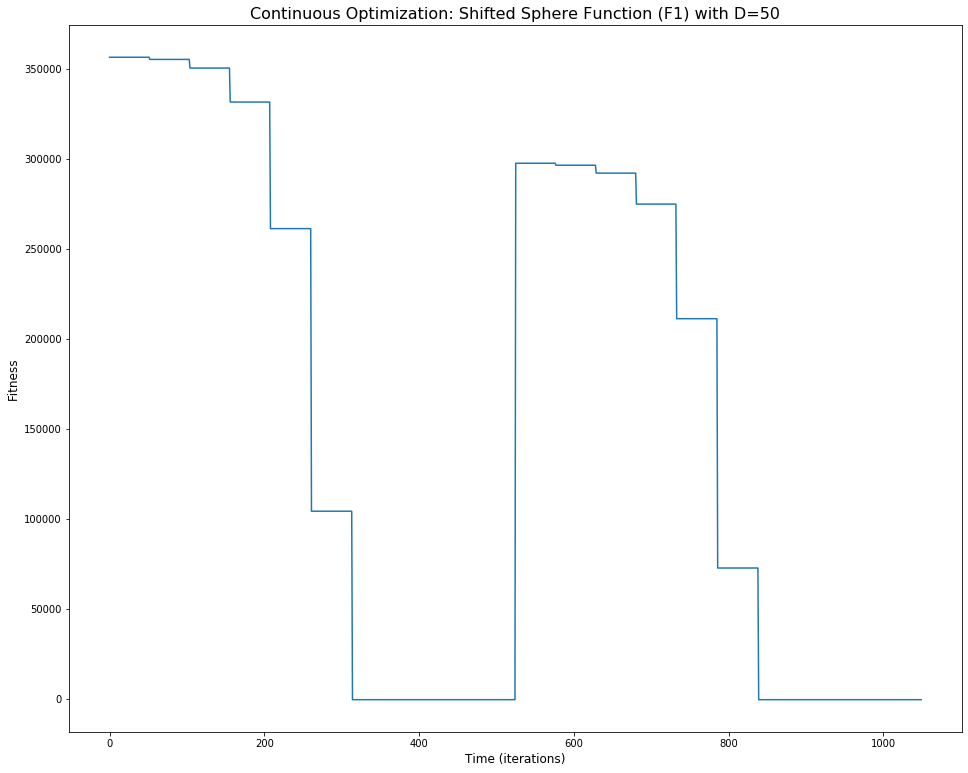

In [33]:
# Plot and save convergence curve
plot_fitness(sol_list)